# Data Preview

In [1]:
import numpy as np
train_data = np.load('/home/haoqian/anomaly/SMD/SMD_test.npy') #(708405, 38)

In [2]:
train_data.shape

(708420, 38)

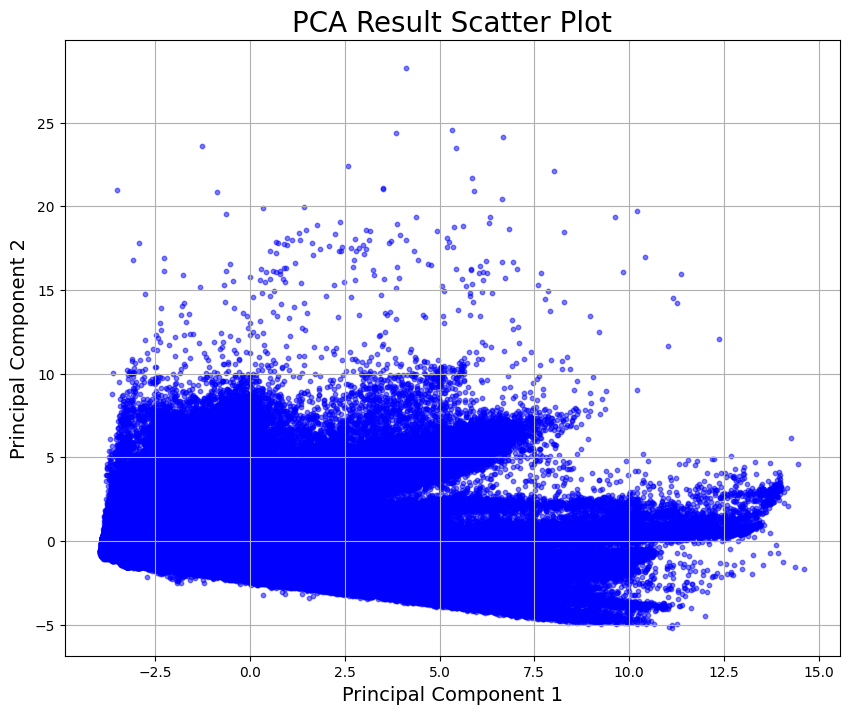

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

train_data = np.load('/home/haoqian/anomaly/SMD/SMD_train.npy')

scaler = StandardScaler()
train_data_standardized = scaler.fit_transform(train_data)

pca = PCA(n_components=2)
train_data_pca = pca.fit_transform(train_data_standardized)

num_samples = 8000000
if train_data_pca.shape[0] > num_samples:
    indices = np.random.choice(train_data_pca.shape[0], num_samples, replace=False)
    sampled_data = train_data_pca[indices]
else:
    sampled_data = train_data_pca

plt.figure(figsize=(10, 8))
plt.scatter(sampled_data[:, 0], sampled_data[:, 1], alpha=0.5, s=10, c='blue')
plt.title('PCA Result Scatter Plot', fontsize=20)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid()
plt.show()

Mean: [1.35660827e-01 7.03106970e-02 8.11965168e-02 9.54518616e-02
 2.63637602e-01 7.22475469e-01 3.94115657e-01 0.00000000e+00
 1.99923459e-02 1.01250573e-03 5.06825298e-02 6.07655011e-02
 1.72873717e-02 7.98331872e-02 5.48692793e-02 6.19628541e-02
 2.49471632e-05 7.86933451e-05 1.65582582e-01 1.58968478e-01
 1.80689365e-01 1.85351864e-01 2.15037525e-01 3.31640035e-01
 1.20914191e-01 3.39327037e-01 2.47033836e-06 1.82138935e-01
 1.58018047e-05 1.00243337e-01 1.91662744e-01 1.05263434e-01
 3.57499644e-02 5.76936305e-02 2.14726329e-01 2.10572943e-01
 1.66652761e-02 9.59135126e-03]
Variance: [1.89491566e-02 1.22627988e-02 1.64932888e-02 2.47706473e-02
 1.73229113e-01 8.69761929e-02 1.04580030e-01 0.00000000e+00
 2.64063128e-03 1.20639103e-04 7.52501236e-03 6.17730990e-03
 1.76467677e-03 1.10398903e-02 6.00968814e-03 7.07731722e-03
 1.41097544e-05 2.44278453e-05 3.33104171e-02 3.05913109e-02
 3.39203402e-02 3.44676711e-02 7.54969418e-02 9.69578549e-02
 2.28983536e-02 1.02494657e-01 1.8527

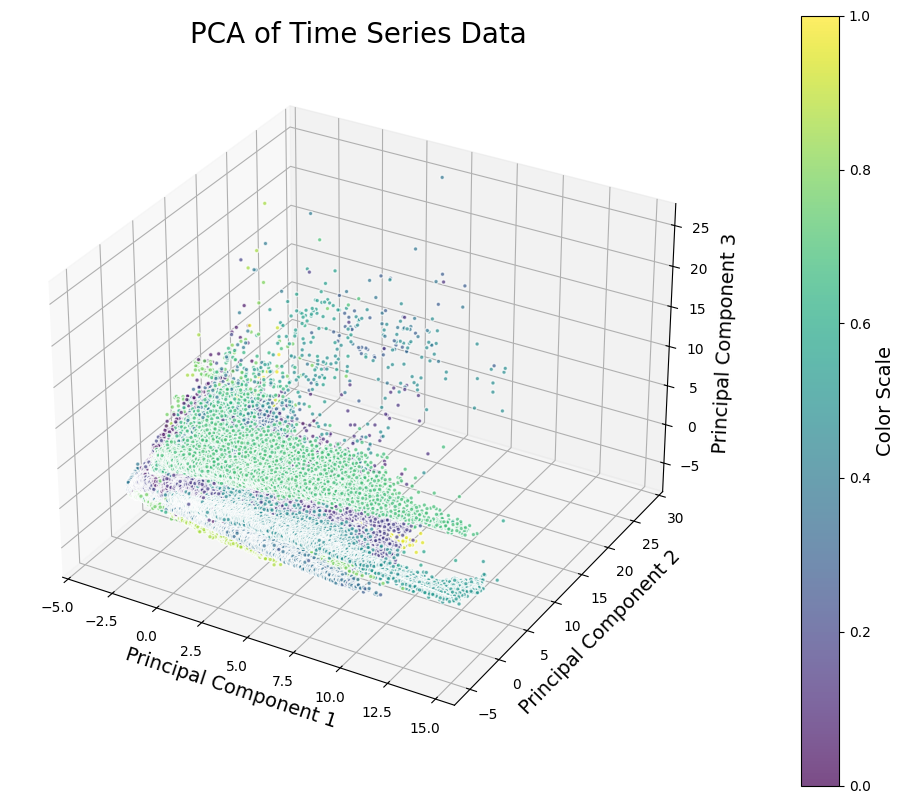

In [3]:
# 3D PCA
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

train_data = np.load('/home/haoqian/anomaly/SMD/SMD_train.npy')

mean = np.mean(train_data, axis=0)
variance = np.var(train_data, axis=0)

print("Mean:", mean)
print("Variance:", variance)

scaler = StandardScaler()
train_data_standardized = scaler.fit_transform(train_data)

pca = PCA(n_components=3)  
train_data_pca = pca.fit_transform(train_data_standardized)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.viridis(np.linspace(0, 1, train_data_pca.shape[0]))
scatter = ax.scatter(train_data_pca[:, 0], train_data_pca[:, 1], train_data_pca[:, 2], 
                     c=colors, s=10, alpha=0.7, edgecolors='w')

ax.set_title('PCA of Time Series Data', fontsize=20)
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
ax.set_zlabel('Principal Component 3', fontsize=14)

ax.grid(True, linestyle='--', alpha=0.5)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Color Scale', fontsize=14)

plt.show()

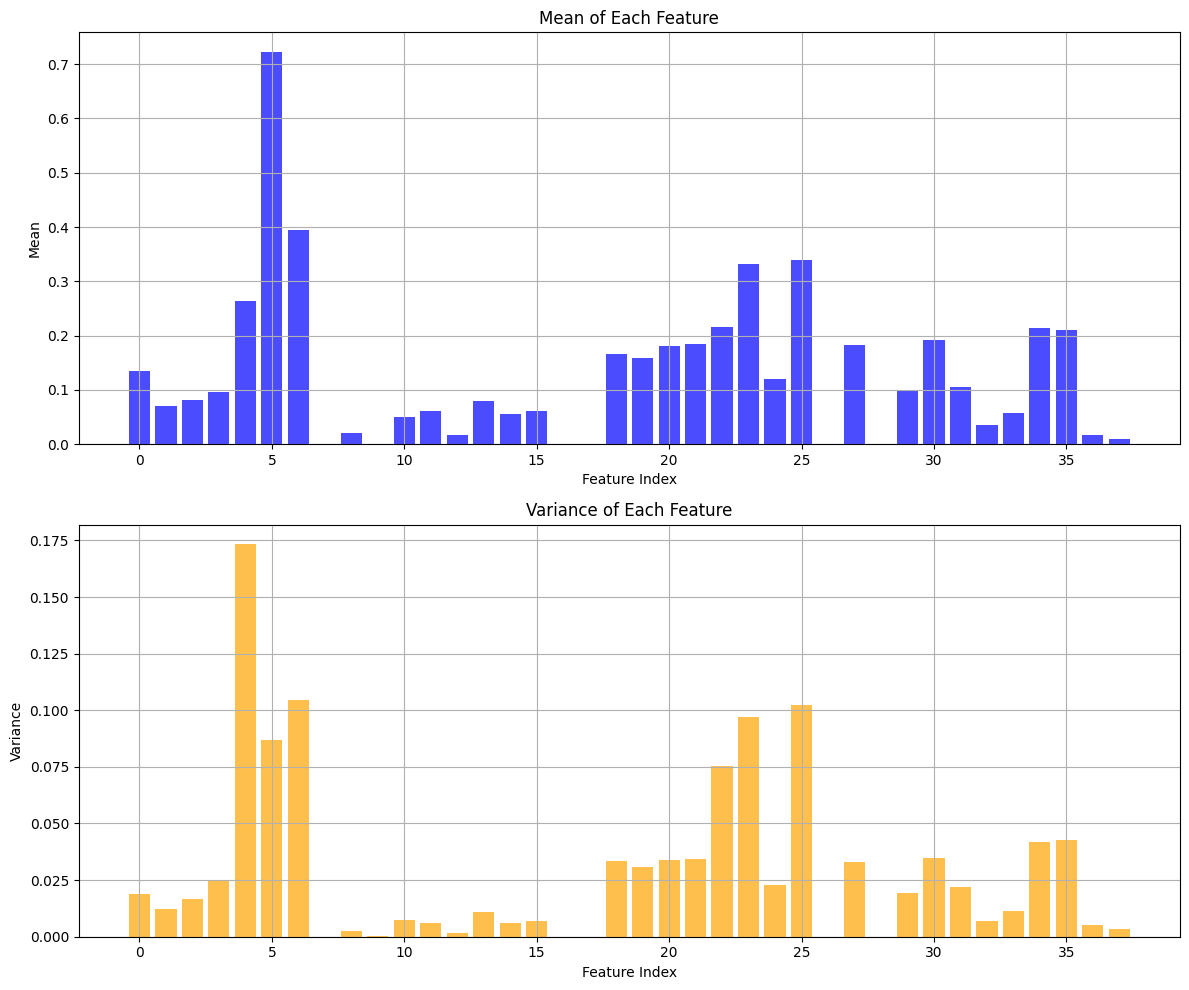

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_data = np.load('/home/haoqian/anomaly/SMD/SMD_train.npy')

mean = np.mean(train_data, axis=0)
variance = np.var(train_data, axis=0)

fig, ax = plt.subplots(2, 1, figsize=(12, 10))

ax[0].bar(range(train_data.shape[1]), mean, color='blue', alpha=0.7)
ax[0].set_title('Mean of Each Feature')
ax[0].set_xlabel('Feature Index')
ax[0].set_ylabel('Mean')
ax[0].grid()

ax[1].bar(range(train_data.shape[1]), variance, color='orange', alpha=0.7)
ax[1].set_title('Variance of Each Feature')
ax[1].set_xlabel('Feature Index')
ax[1].set_ylabel('Variance')
ax[1].grid()

plt.tight_layout()
plt.show()

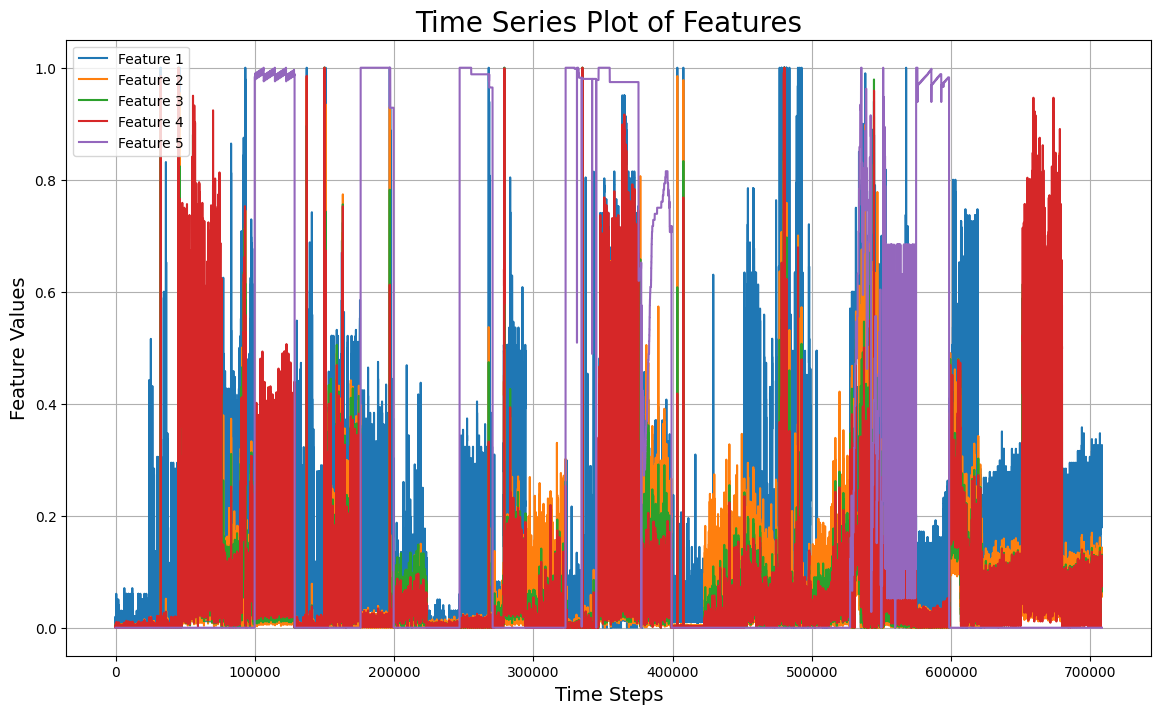

In [10]:
import numpy as np
import matplotlib.pyplot as plt

train_data = np.load('/home/haoqian/anomaly/SMD/SMD_train.npy')  # (708405, 38)

num_features = 5
features_to_plot = train_data[:, :num_features] 

time_steps = np.arange(features_to_plot.shape[0])

plt.figure(figsize=(14, 8))
for i in range(num_features):
    plt.plot(time_steps, features_to_plot[:, i], label=f'Feature {i+1}')

plt.title('Time Series Plot of Features', fontsize=20)
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Feature Values', fontsize=14)
plt.legend()
plt.grid()
plt.show()

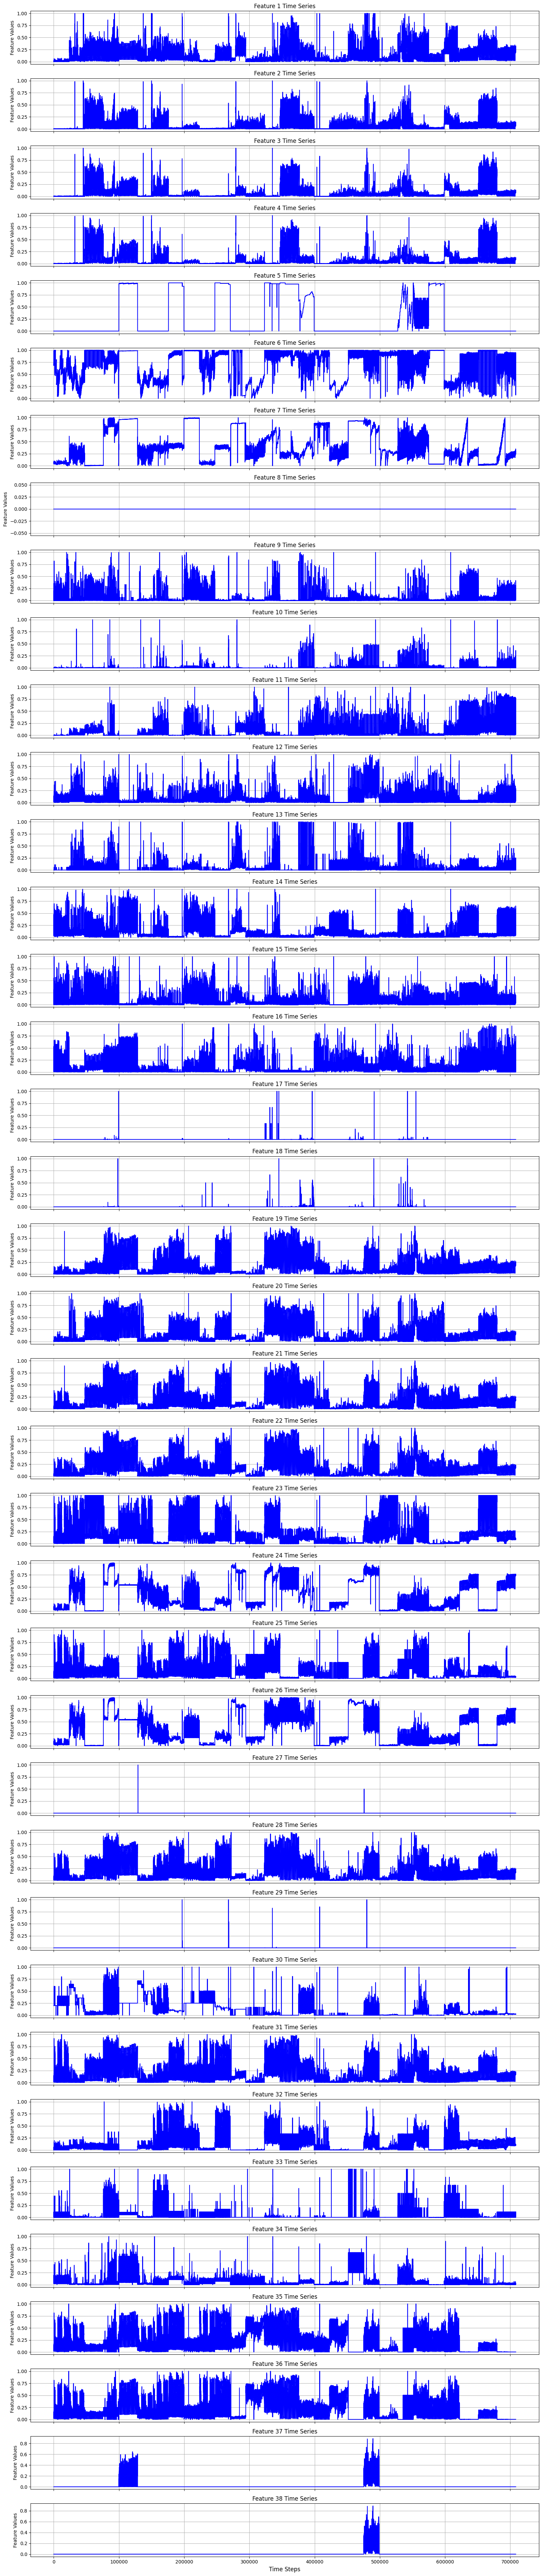

In [13]:
import numpy as np
import matplotlib.pyplot as plt

train_data = np.load('/home/haoqian/anomaly/SMD/SMD_train.npy')  # (708405, 38)

num_features = train_data.shape[1]  
features_to_plot = train_data  

time_steps = np.arange(features_to_plot.shape[0])

fig, axs = plt.subplots(num_features, 1, figsize=(16, 2 * num_features), sharex=True)

for i in range(num_features):
    axs[i].plot(time_steps, features_to_plot[:, i], label=f'Feature {i + 1}', color='blue')
    axs[i].set_title(f'Feature {i + 1} Time Series', fontsize=12)
    axs[i].set_ylabel('Feature Values', fontsize=10)
    axs[i].grid()

plt.xlabel('Time Steps', fontsize=12)
plt.tight_layout()
plt.show()